<center>
<img src='images/logo.jpg' width='300px'>
<h2> Chương 3: CÁC PHƯƠNG PHÁP PHÁT HIỆN BIÊN TRONG ẢNH</h2>
</center>

---
* Mã sinh viên: 2021050885
* Họ tên sinh viên: Nguyễn Thị Thùy Trang
* Lớp:DCCTHT65B
---
* Bài toán phát hiện cạnh, biên (Edge Detection) được ứng dụng rất nhiều trong các bài toán về thị giác máy tính. Như trong các bài toán về trích xuất thông tin, nhận dạng đối tượng….

* Biên là nơi mã hóa nhiều thông tin ngữ nghĩa (semantics information) và hình dạng (shape) trong một bức ảnh.

* Điểm biên: Một điểm ảnh được coi là điểm biên nếu có sự thay đổi nhanh hoặc đột ngột về mức xám (hoặc màu). Ví dụ: trong ảnh nhị phân, điểm đen được coi là điểm biên nếu lân cận của nó có ít nhất một điểm trắng.
* Đường biên còn được gọi là đường bao (boundary): là tập hợp các điểm biên liên tiếp.

<img src='images/pic1.png' width='500px'>

**Nội dung bài học:**
1. Bài toán phát hiện cạnh (Edge detection) và ứng dụng
2. Các phương pháp phát hiện biên
3. Gradient base (1st order)
    1. Sobel edge detection
    2. Prewitt edge detection
    3. Roberts edge detection
4. Laplacian based (2nd order)
    1. Laplace edge detection
    2. Canny edge detection

---
* Mã sinh viên: 2021050885
* Họ tên sinh viên: Nguyễn Thị Thùy Trang
* Lớp:DCCTHT65B


## THỰC HÀNH 3.1
---

1. Đọc và hiển thị ảnh Thuchanh3_1.jpg ở dạng ảnh xám
2. Sử dụng bộ lọc Sobel theo hướng x, y và XY. hiển thị kết quả.
3. Sử dụng phương thức Sobel với ksize = 7 theo X, Y và XY. Hiển thị kết quả.

<img src='images/Thuchanh3_1.jpg' width='500px'>

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

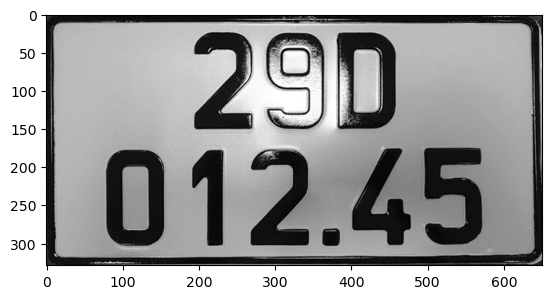

In [96]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
#Đọc ảnh ở chế độ ảnh xám:
img_orignal1 = cv2.imread('images/Thuchanh3_1.jpg',0)

#Hiển thị ảnh gốc:
plt.imshow(img_orignal1,cmap='gray')
plt.show()

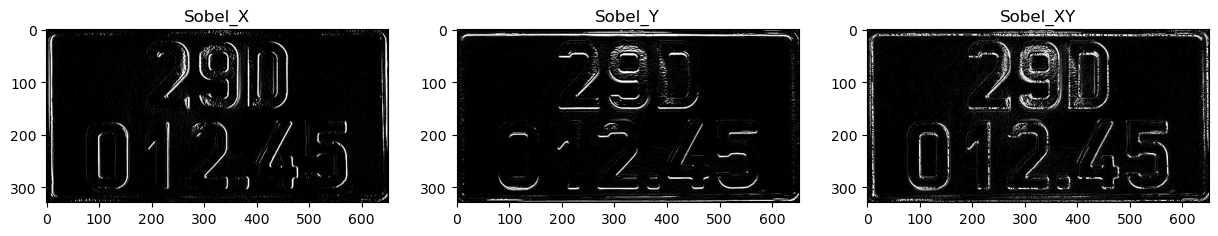

In [97]:

#-------------------------
#Khởi tạo kernel Sobel theo hướng X:
sobel_x1 = np.array([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_x1
#----------------------------
#Khởi tạo kernel sobel theo hướng Y:
sobel_y1 = np.array([[-1,-2,-1], 
                    [ 0, 0, 0],
                    [ 1, 2, 1]])
sobel_y1
#-----------------------------
#Thực hiện lọc ảnh với kernel ở trên:
img_x1 = cv2.filter2D(img_orignal1, -1, sobel_x1)
#-----------------------------------
#Thực hiện lọc ảnh với kernel ở trên:
img_y1 = cv2.filter2D(img_orignal1, -1, sobel_y1)
#--------------------------------------

#kết hợp theo X, Y
img_xy1 = img_x1 + img_y1

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(img_x1,cmap='gray')
plt.title('Sobel_X')

plt.subplot(1,3,2)
plt.imshow(img_y1,cmap='gray')
plt.title('Sobel_Y')

plt.subplot(1,3,3)
plt.imshow(img_xy1,cmap='gray')
plt.title('Sobel_XY')
plt.show()


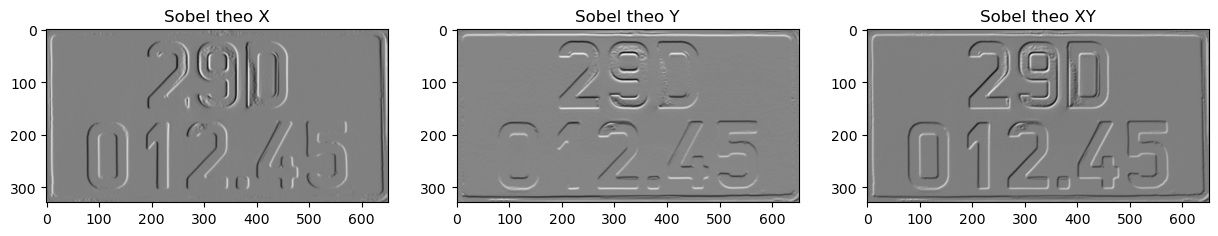

In [59]:
#Sobel edges:
sobel_x2 = cv2.Sobel(img_orignal1,cv2.CV_64F,1,0,ksize=7)
sobel_y2 = cv2.Sobel(img_orignal1,cv2.CV_64F,0,1,ksize=7)

#Sobel theo cả x, y
img_sobel_2= sobel_x2 + sobel_y2

#Hiển thị ảnh gốc và ảnh thay đổi kích thước
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(sobel_x2,cmap='gray')
plt.title('Sobel theo X')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y2,cmap='gray')
plt.title('Sobel theo Y')

plt.subplot(1, 3, 3)
plt.imshow(img_sobel_2,cmap='gray')
plt.title('Sobel theo XY')
plt.show()
#------------------


## THỰC HÀNH 3.2
---
1. Đọc ảnh và hiển thị ảnh Thuchanh3_2.jpeg ở dạng ảnh xám
2. Sử dụng bộ lọc Prewitt và Roberts phát hiện cạnh, hiển thị kết quả.
3. Sử dụng bộ lọc Robinson (trong Slide) phát hiện cạnh và hiển thị kết quả.

<img src='images/Thuchanh3_2.jpeg' width='300px'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

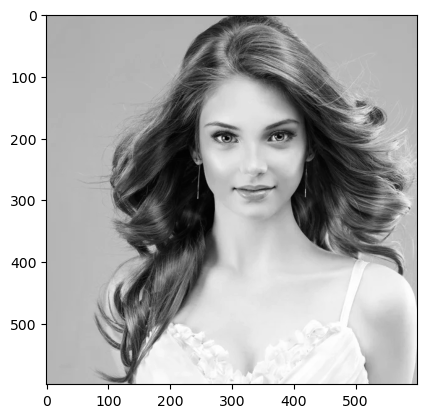

In [20]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
girl = "images/Thuchanh3_2.jpeg"
img_girl=cv2.imread(girl,0)
#Hiển thị ảnh gốc:
plt.imshow(img_girl,cmap='gray');




In [21]:
#Khởi tạo kernel prewitt theo hướng x:
prewitt_x = np.array([[-1, 0, 1], 
                     [ -1, 0, 1],
                     [ -1, 0, 1]])

#Khởi tạo kernel prewitt theo hướng y:
prewitt_y = np.array([[-1, -1,-1], 
                     [  0,  0, 0],
                     [  1,  1, 1]])
# Sử dụng bộ lọc pewitt
girl_prewitt_x = cv2.filter2D(img_girl,-1,prewitt_x)
girl_prewitt_y = cv2.filter2D(img_girl,-1,prewitt_y)
prewitt_girl = girl_prewitt_x + girl_prewitt_y

In [22]:
#Sử dụng bộ lọc Roberts
roberts_x = np.array( [[1, 0 ],
                       [0,-1 ]] )
  
roberts_y = np.array( [[ 0, 1 ],
                       [ -1, 0 ]])
#Sử dụng bộ lọc Roberts
girl_roberts_x = cv2.filter2D(img_girl, -1, roberts_x)
girl_roberts_y = cv2.filter2D(img_girl, -1, roberts_y)
roberts_girl = girl_roberts_x + girl_roberts_y

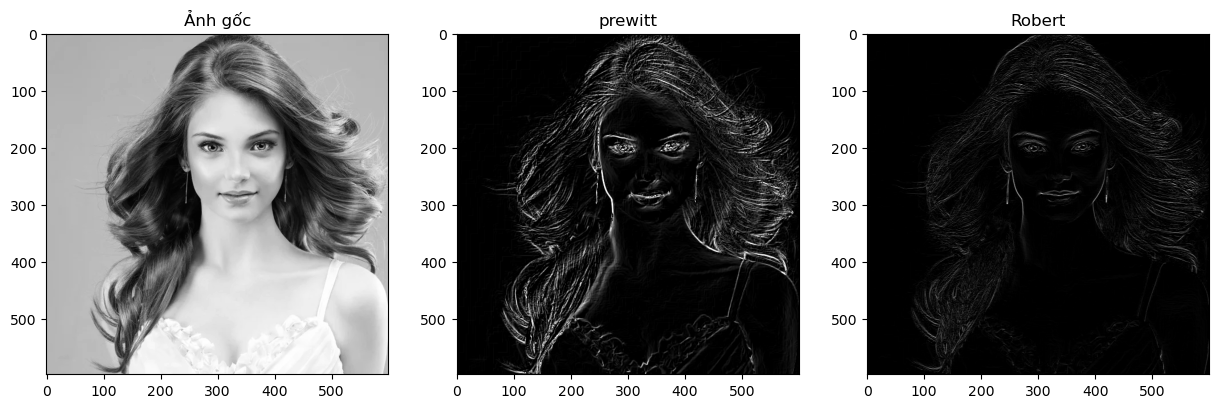

In [23]:
#Hiển thị ảnh
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title("Ảnh gốc")
plt.imshow(img_girl,cmap='gray')

plt.subplot(1,3,2)
plt.title("prewitt")
plt.imshow(prewitt_girl,cmap='gray')


plt.subplot(1,3,3)
plt.title("Robert")
plt.imshow(roberts_girl,cmap='gray');

In [24]:
#Sử dụng bộ lọc Robinson (trong Slide) phát hiện cạnh và hiển thị kết quả.
x1 = np.array([[-2, -1, 0],
             [-1, 0, 1],
             [0, 1, 2]])
y1 = np.array([[-2, -1, 0],
             [-1, 0, 1],
             [0, 1, 2]])
girl_Robinson_x1 = cv2.filter2D(img_girl, -1, x1)
girl_Robinson_y1 = cv2.filter2D(img_girl, -1, y1)
girl_Robinson1 = girl_Robinson_x1 + girl_Robinson_y1


In [25]:
x2 = np.array([[-2, -1, 0],
             [-1, 0, 1],
             [0, 1, 2]])
y2 = np.array([[2, 1, 0],
             [1, 0, -1],
             [0, -1, -2]])
girl_Robinson_x2 = cv2.filter2D(img_girl, -1, x2)
girl_Robinson_y2 = cv2.filter2D(img_girl, -1, y2)
girl_Robinson2 = girl_Robinson_x2 + girl_Robinson_y2


In [26]:
x3 = np.array([[0, -1, -2],
             [1, 0, -1],
             [2, 1, 0]])
y3 = np.array([[0, 1, 2],
             [-1, 0, 1],
             [-2, -1, 0]])
girl_Robinson_x3 = cv2.filter2D(img_girl, -1, x3)
girl_Robinson_y3 = cv2.filter2D(img_girl, -1, y3)
girl_Robinson3 = girl_Robinson_x3 + girl_Robinson_y3


In [32]:
x4 = np.array([[-2, -1, 0],
             [-1, 0, 1],
             [0, 1, 2]])
y4 = np.array([[2, 1, 0],
             [1, 0, -1],
             [0, -1, -2]])
girl_Robinson_x4 = cv2.filter2D(img_girl, -1, x4)
girl_Robinson_y4 = cv2.filter2D(img_girl, -1, y4)
girl_Robinson4 = girl_Robinson_x4 + girl_Robinson_y4


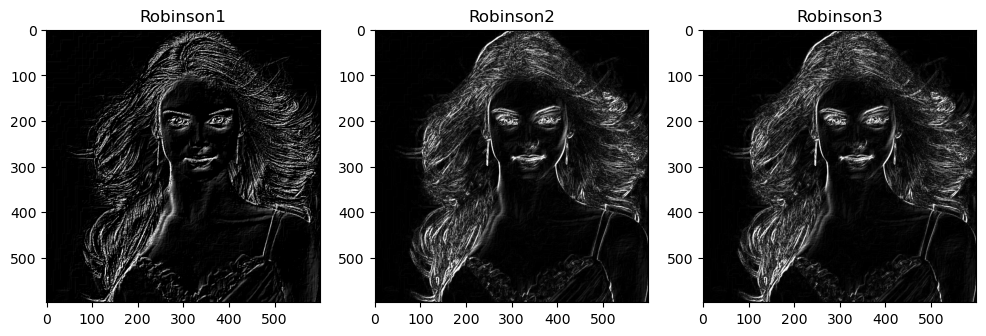

In [36]:
fig,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(girl_Robinson1,cmap='gray')
ax[0].set_title("Robinson1")

ax[1].imshow(girl_Robinson2,cmap='gray')
ax[1].set_title("Robinson2")

ax[2].imshow(girl_Robinson4,cmap='gray');
ax[2].set_title("Robinson3");

## THỰC HÀNH 3.3
---
1. Đọc và hiển thị ảnh Thuchanh3_3.png. 
2. Sử dụng phương pháp làm trơn ảnh medianBlur() để khử nhiễu.
3. Sử dụng bộ lọc Lapacian với mặt nạ số 2 trên ảnh đã làm trơn với ddepth = -1|CV_32FC4 và hiển thị kết quả

<img src = 'images/Thuchanh3_3.png' width = '300px'>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

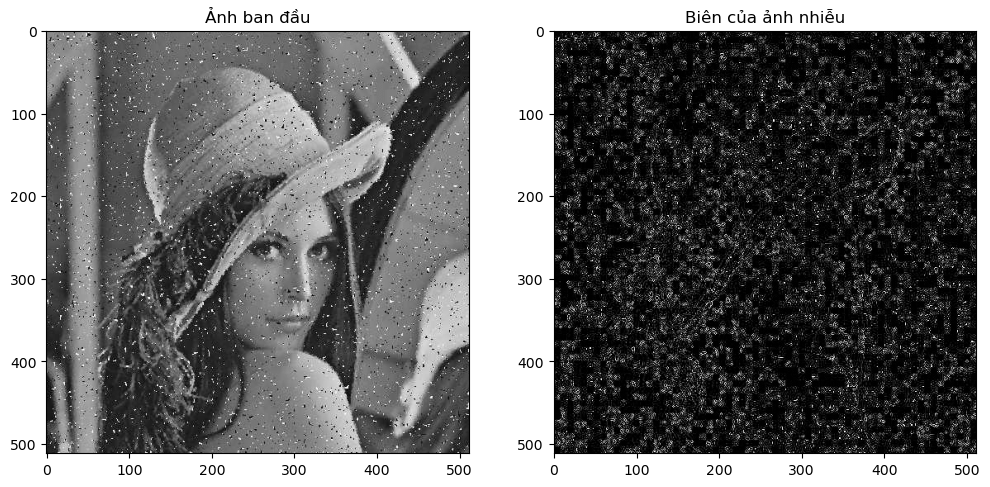

In [49]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}

img33 = cv2.imread('images/Thuchanh3_3.png',0)
fix, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img33,cmap='gray')
ax[0].set_title('Ảnh ban đầu')
#Yêu cầu 1: Phát hiện cạnh biên của ảnh gốc chưa khử nhiễu
img_edge = cv2.Laplacian(img33,-1, 3)
ax[1].imshow(img_edge,cmap='gray')
ax[1].set_title("Biên của ảnh nhiễu")
plt.show()

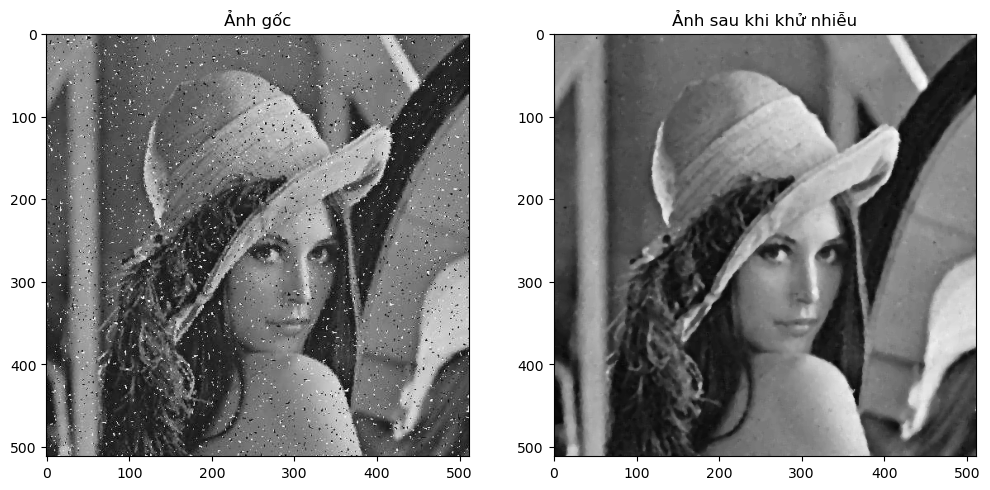

In [63]:
#Khử nhiễu ảnh:
img_new = cv2.medianBlur(img33, 5)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img33,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1,2,2)
plt.imshow(img_new,cmap='gray')
plt.title('Ảnh sau khi khử nhiễu')
plt.show()

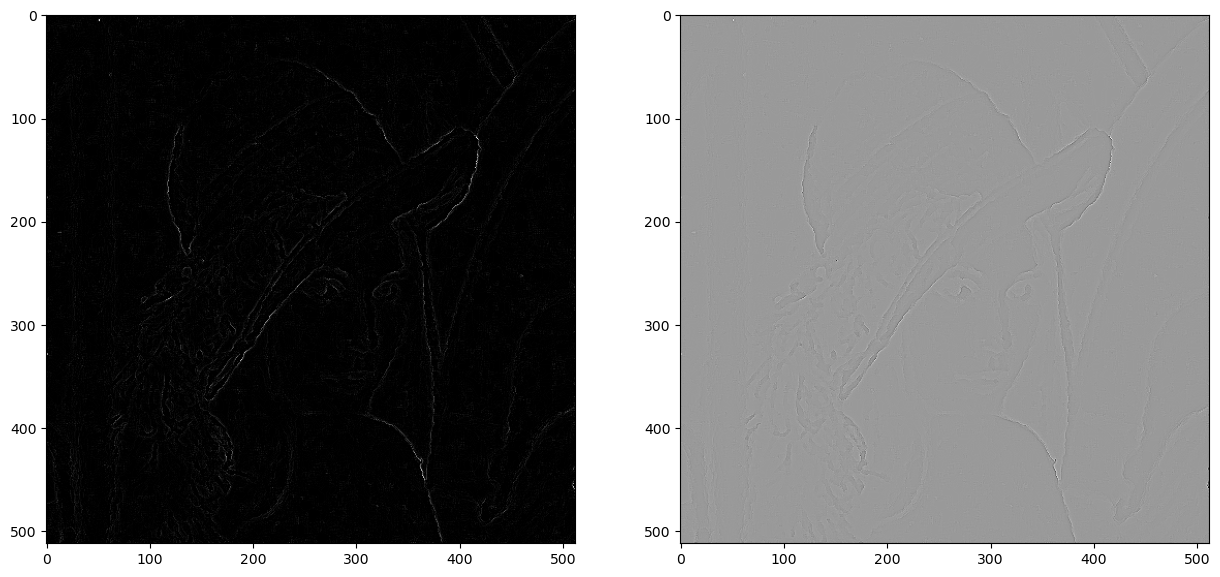

In [64]:
img_edge2 = cv2.Laplacian(img_new,-1, 30)
img_edge3 = cv2.Laplacian(img_new,cv2.CV_64F, 3)
#Hiển thị kết quả
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img_edge2,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_edge3,cmap='gray')
plt.show()




# THỰC HÀNH 3.4
---
1. Đọc và hiển thị ảnh Thuchanh3_4.jpeg.
2. Sử dụng phương pháp Canny với các tham số phù hợp để thu được kết quả biên như trong slide.

<img src='images/Thuchanh3_4.jpeg' width='400px'>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

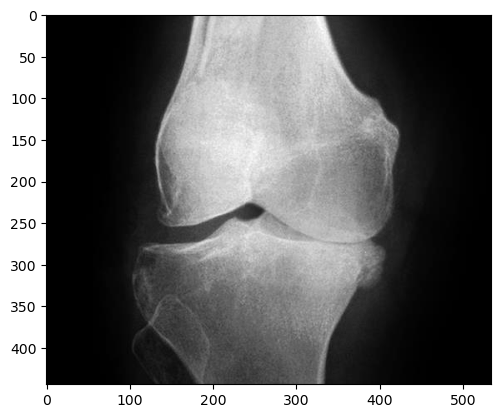

In [35]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
img = 'images/Thuchanh3_4.jpeg'
knee = cv2.imread(img,0)
plt.imshow(img_4,cmap='gray');





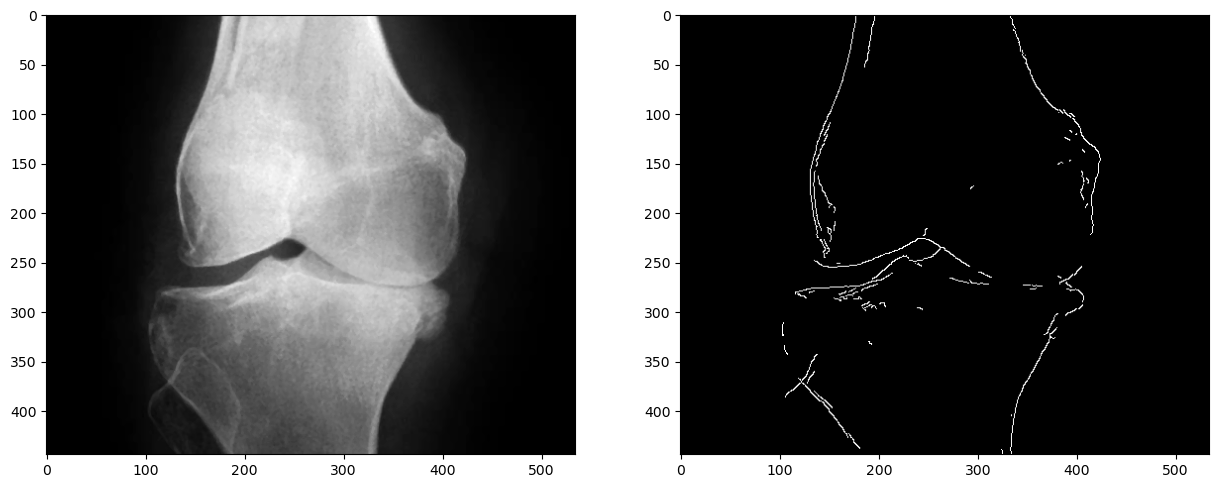

In [89]:
median = cv2.medianBlur(knee,3)
fix, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].imshow(median,cmap='gray')

knee_madian_Canny = cv2.Canny(median,80,120,5)
ax[1].imshow(knee_madian_Canny,cmap='gray');